In [2]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.append(str(Path().absolute().parent))  # Add parent directory, necessary for notebook

from util.hypso import get_hypso_vector, plot_hypso_vector, get_hypso_attributes_from_vector

## read and clean DEM data

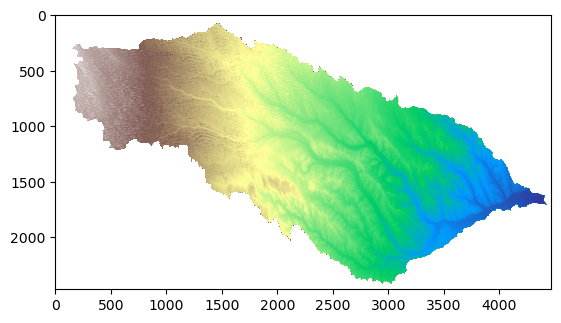

In [6]:
# 1. Load the DEM
dem_filepath = "HydroBasin_7060505540.tif"

# uncomment below to see the other example
# dem_filepath = "HydroBasin_7060006420.tif" 

with rasterio.open(dem_filepath) as src:
    dem = src.read(1)
    transform = src.transform
    crs = src.crs
    nodata_value = src.nodata  # Get the NoData value directly from the raster

# 2. Flatten, handle NoData, and sort elevation values
elevations = dem.flatten()
valid_elevations = elevations[elevations != nodata_value]  # Filter out NoData values

# plot the DEM, be careful with the no data value
plt.imshow(dem, cmap='terrain', clim = (np.min(valid_elevations), np.max(valid_elevations)))


## Calculate the hypsometry parameters


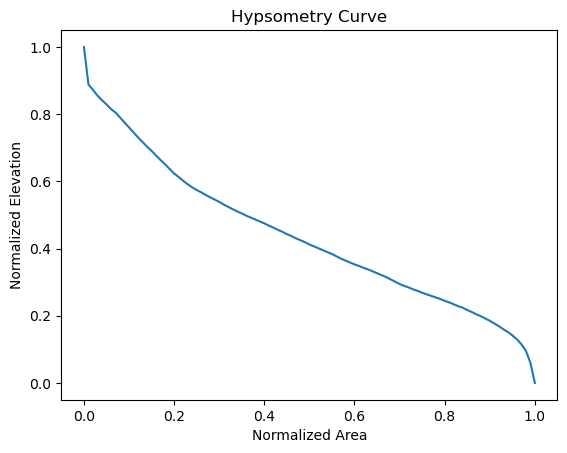

In [7]:
hypso_vector = get_hypso_vector(valid_elevations) # use cleaned data 
# plot the hypsometry vector
plot_hypso_vector(hypso_vector)

In [8]:
# print the hypsometry parameters
params = get_hypso_attributes_from_vector(hypso_vector)
for key, value in params.items():
    print(f"{key}: {value:.4f}")


HI: 0.4375
SK: 0.5178
KUR: 2.1989
DSK: 0.2927
DKUR: 1.5890
R2: 0.9991
